In [1]:
import drawSvg as draw
import math
from random import uniform

/Users/hfarid/Library/Python/3.9/lib/python/site-packages/drawSvg/raster.py:25: RuntimeWarning: CairoSVG will need to be installed to rasterize images: Install with `pip3 install cairosvg`
Original ImportError: No module named 'cairocffi'
  warnings.warn(msg, RuntimeWarning)


In [2]:
# Eye class
class Eye:
    def __init__(self, x, y, rad, color='blue'):
        # eye position and size
        self.x = x
        self.y = y
        self.rad = rad
        
        # eye gaze direction
        self.direction = 0 # not passed in

        # eye color
        self.color = color
        
    def lookat(self, lx, ly):
        self.direction = math.atan2(ly-self.y, lx-self.x) # move eye to look at (lx,ly)

    def drawEye(self):
        # draw outer circle
        D.append(draw.Circle(self.x, self.y, self.rad, fill='white', stroke='black'))
        
        # draw inner circle
        ix = 0.4 * self.rad * math.cos(self.direction) + self.x
        iy = 0.4 * self.rad * math.sin(self.direction) + self.y
        D.append(draw.Circle(ix, iy, 0.5*self.rad, fill=self.color, stroke='black'))

In [3]:
# Face class
class Face:
    def __init__(self, x, y, size):
        # face position and size
        self.x = x
        self.y = y
        self.size = size
        
        # create eyes
        self.lefteye = Eye( x-40, y+50, 30 )
        self.righteye = Eye( x+40, y+50, 30 )
        
    def lookat(self, lx, ly):
        self.lefteye.lookat( lx, ly )
        self.righteye.lookat( lx, ly )
       
    def drawFace(self):
        # draw face
        D.append(draw.Circle(self.x, self.y, self.size, fill='white', stroke='black'))

        # draw eyes
        self.lefteye.drawEye()
        self.righteye.drawEye()
        
        # draw nose
        p = draw.Path(stroke='black', fill='white')
        p.M(self.x+0,self.y+30)   # Start path 
        p.l(30,-30) # Draw line to next point
        p.l(-30,0)  # Draw line to next point
        D.append(p)

        # draw mouth
        D.append(draw.Arc(self.x+0,self.y-30,40,180,0, stroke='black', fill='white'))

In [4]:
# Crowd class 
class Crowd:
    def __init__(self, N):
        self.N = N
        
        self.the_crowd = []
        for i in range( 0, N ):
            self.the_crowd.append( Face(uniform(-CANVAS_WIDTH/2,CANVAS_WIDTH/2), 
                                        uniform(-CANVAS_HEIGHT/2,CANVAS_HEIGHT/2), 100) )
            
        self.lookat()
        
    def lookat(self,angle=45): # specify angle in degrees
        for i in range( 0, self.N ):
            self.the_crowd[i].lookat( 1000*math.cos(angle*math.pi/180), 1000*math.sin(angle*math.pi/180) )

    def draw(self):
        for i in range( 0, self.N ):
            self.the_crowd[i].drawFace()

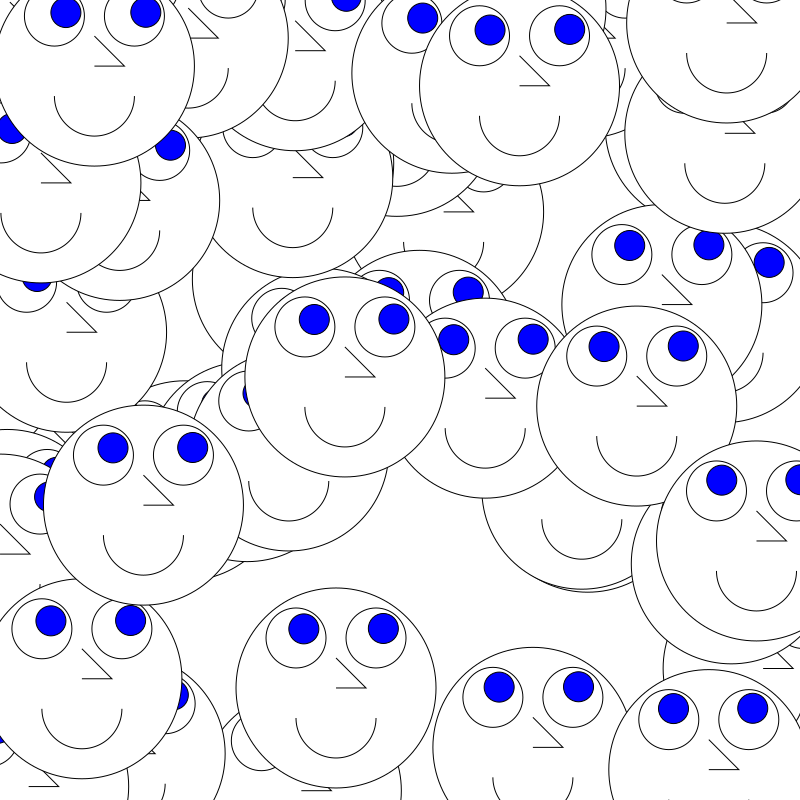

In [5]:
# draw crowd    
CANVAS_WIDTH = 800
CANVAS_HEIGHT = 800
D = draw.Drawing(CANVAS_WIDTH, CANVAS_HEIGHT, origin='center') # define drawing canvas
C = Crowd(50)
C.draw()   
D

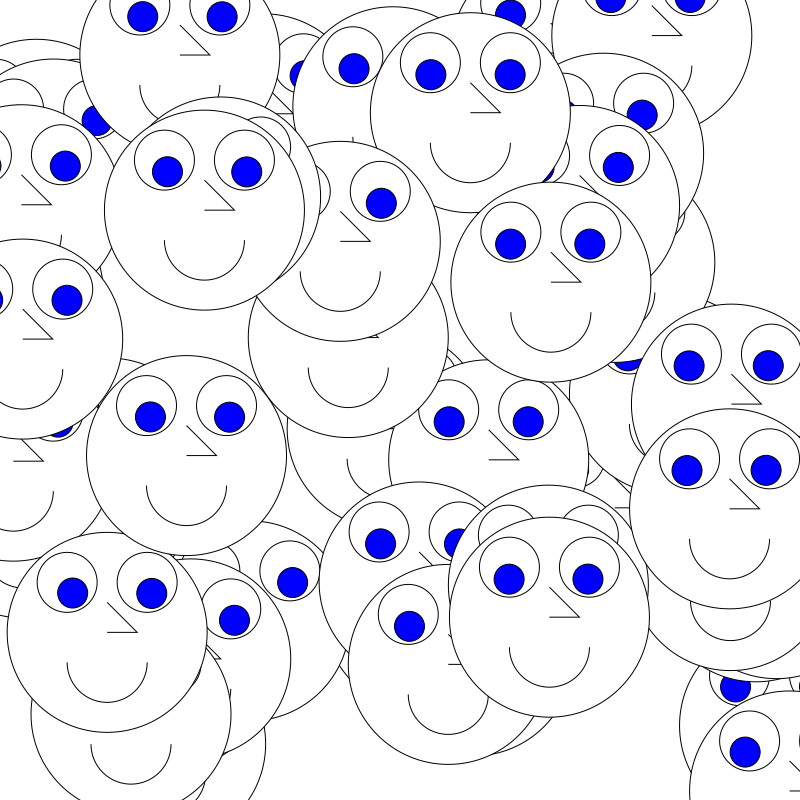

In [6]:
# draw crowd looking around
def draw_frame(a):
    C.lookat(a)
    C.draw()  
    return D

C = Crowd(50)
for a in range(0,1000,5):
    D = draw.Drawing(CANVAS_WIDTH, CANVAS_HEIGHT, origin='center' ) # erase canvas
    with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
        anim.draw_frame(a)
        